### Project Aim:

The goal of this analysis was to utilize pandas and data visualization techniques to investigate whether Fandango's ratings in 2015 exhibited a bias towards rating movies more favorably, potentially to drive ticket sales.

### The Data:

This analysis was based on data from the article [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)  which is publicly available on 538's GitHub repository: https://github.com/fivethirtyeight/data. 

*The dataset includes two CSV files: one detailing Fandango’s Star and Displayed Ratings, and another aggregating movie ratings from other platforms such as Metacritic, IMDB, and Rotten Tomatoes.*

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

**Imported the necessary libraries anticipated for use in this analysis, including pandas for data manipulation and visualization libraries such as Matplotlib and Seaborn.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

**Exploring the DataFrame Properties.**

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Visualized the relationship between a film's popularity and its rating through a Scatterplot**

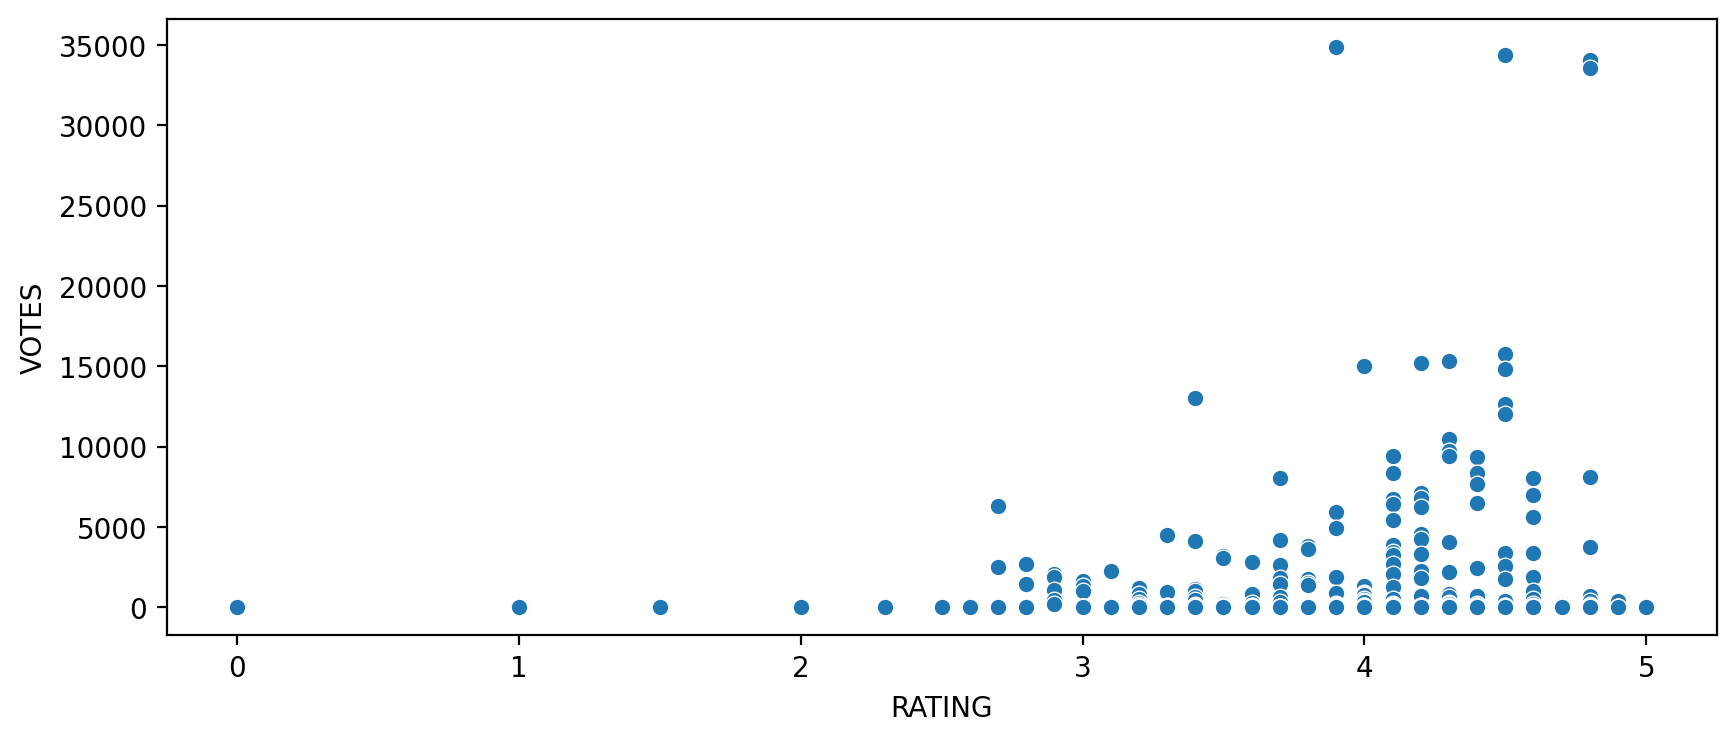

In [6]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=fandango,x='RATING',y='VOTES');

**Calculated the correlation between the columns**

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Assuming that every row in the FILM title column has the same format:**

   Film Title Name (Year)
   
**Created a new column that is able to strip the year from the title strings and have set up this new column as YEAR**

In [8]:
fandango['YEAR'] = fandango['FILM'].apply(lambda name:name.split('(')[-1])

**Counted the Number of Movies in the Fandango DataFrame by Year**

In [9]:
fandango['YEAR'].value_counts()

2015)    478
2014)     23
1964)      1
2012)      1
2016)      1
Name: YEAR, dtype: int64

**Visualized the distribution of movies per year by plotting a count of movies released each year using a bar plot**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

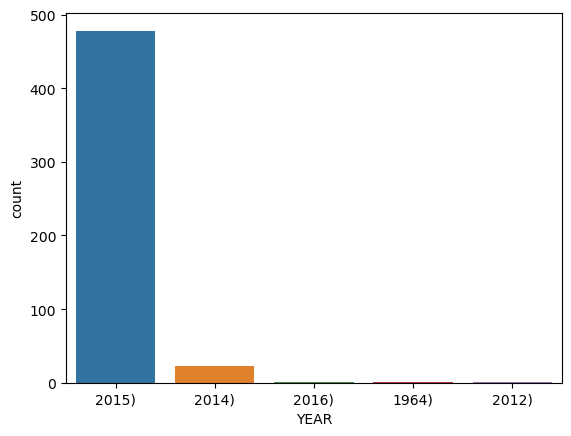

In [10]:
sns.countplot(data=fandango,x='YEAR')

**10 movies with the highest number of votes.**

In [11]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


**Movies with zero votes.**

In [12]:
no_votes = fandango['VOTES']==0 
no_votes.sum()

69

**Created a DataFrame of only reviewed films by removing any films that have zero votes.**

In [14]:
reviewed = fandango[fandango['VOTES']>0]

**Visualized the distribution of displayed ratings (STARS) versus true user ratings (RATING) using KDE plots to compare the differences.**

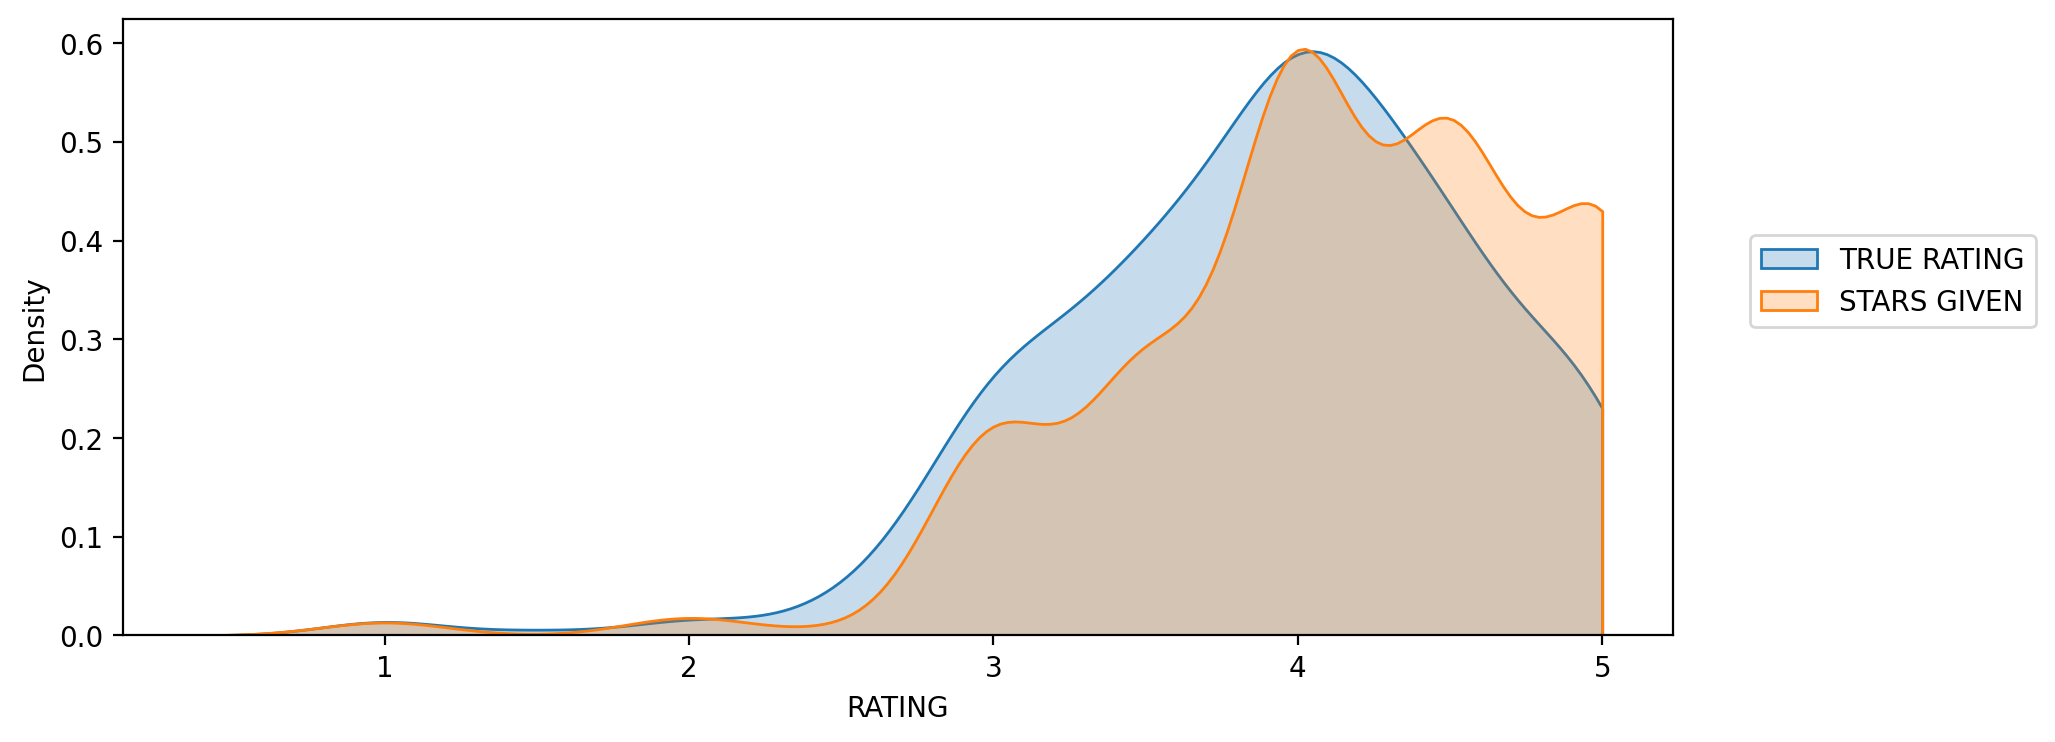

In [16]:
plt.figure(figsize = (10,4), dpi = 200)
sns.kdeplot(data = reviewed, x = 'RATING', clip=[0,5], fill= True, label= 'TRUE RATING' )
sns.kdeplot(data = reviewed, x = 'STARS', clip=[0,5], fill= True, label = 'STARS GIVEN' )
plt.legend(loc=(1.05,0.5))

**Findings : The KDE plot shows that the displayed ratings (STARS) are different from the true user ratings (RATING), indicating a discrepancy between what is shown and what users actually rate.** 

**Calculated the discrepancy between displayed ratings (STARS) and true user ratings (RATING) by creating a new column for the difference (STARS - RATING) and rounded these differences to the nearest decimal point.**

In [17]:
import warnings
warnings.simplefilter('ignore')
reviewed['STARS_DIFF'] = round(reviewed['STARS'] - reviewed['RATING'], 1)
reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


**Created a count plot to display the number of times a certain difference occurs.**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

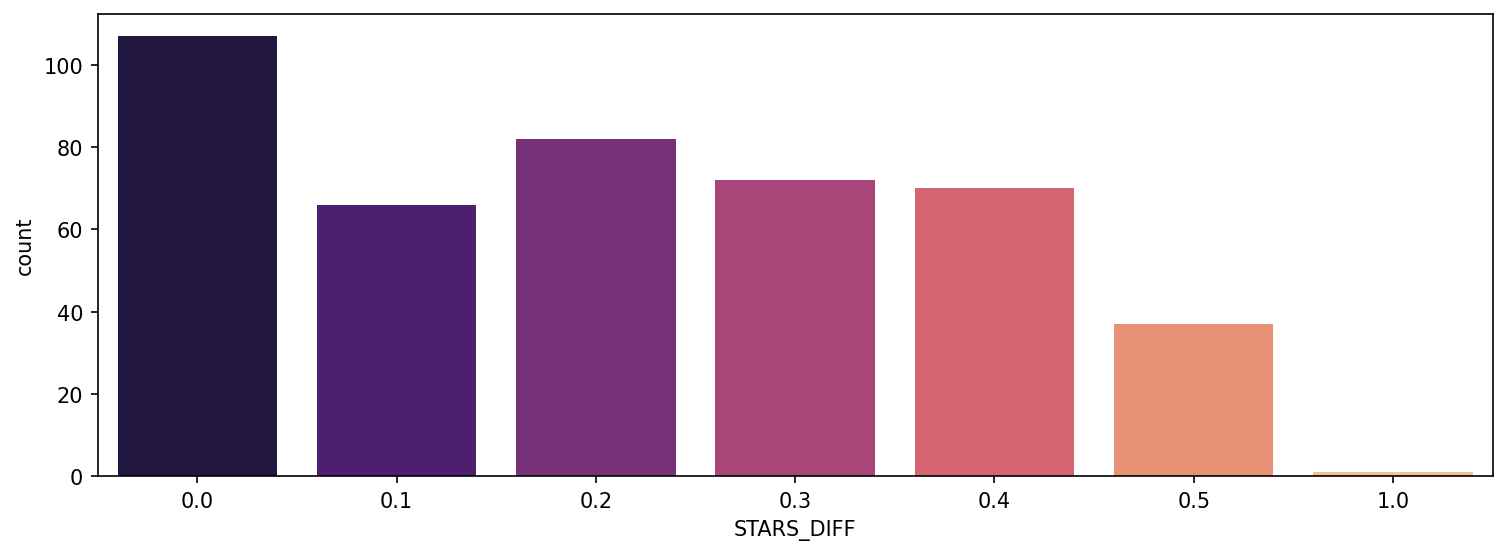

In [18]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=reviewed,x='STARS_DIFF',palette='magma')

**Identified the movie with over a 1-star difference between its displayed rating (STARS) and true rating (RATING) from the data.**

In [19]:
reviewed[reviewed['STARS_DIFF'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


**Read in the 'all_sites_scores.csv' file, explored the DataFrame columns, info, and description, and prepared to compare Fandango scores with those from other movie sites.**

In [20]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [21]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [22]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [23]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


**Created a scatterplot to explore the relationship between Rotten Tomatoes Critic reviews and Rotten Tomatoes User reviews, focusing on the correlation between the two sets of ratings.**

(0.0, 100.0)

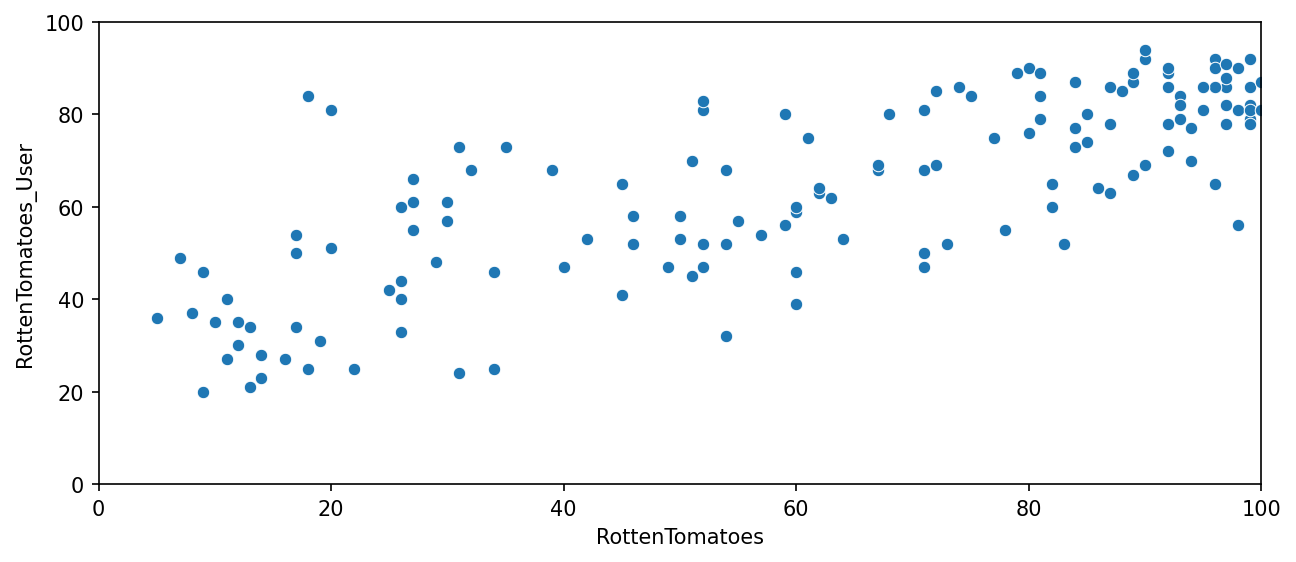

In [24]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

**Calculated the difference between Rotten Tomatoes Critic ratings and User ratings by creating a new column for the difference (RottenTomatoes - RottenTomatoes_User) to quantify the discrepancy, where values closer to 0 indicate agreement between critics and users.**

In [25]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


**Calculated the Mean Absolute Difference between Rotten Tomatoes Critic scores and User scores by taking the absolute value of the differences and then computing the mean to understand the average discrepancy between the two sets of ratings.**

In [26]:
all_sites['Rotten_Diff'].abs().mean()

15.095890410958905

**Plotted the distribution of the differences between Rotten Tomatoes Critic Scores and User Scores, including negative values, using a KDE plot or histogram to visualize the spread of discrepancies between the two ratings.**

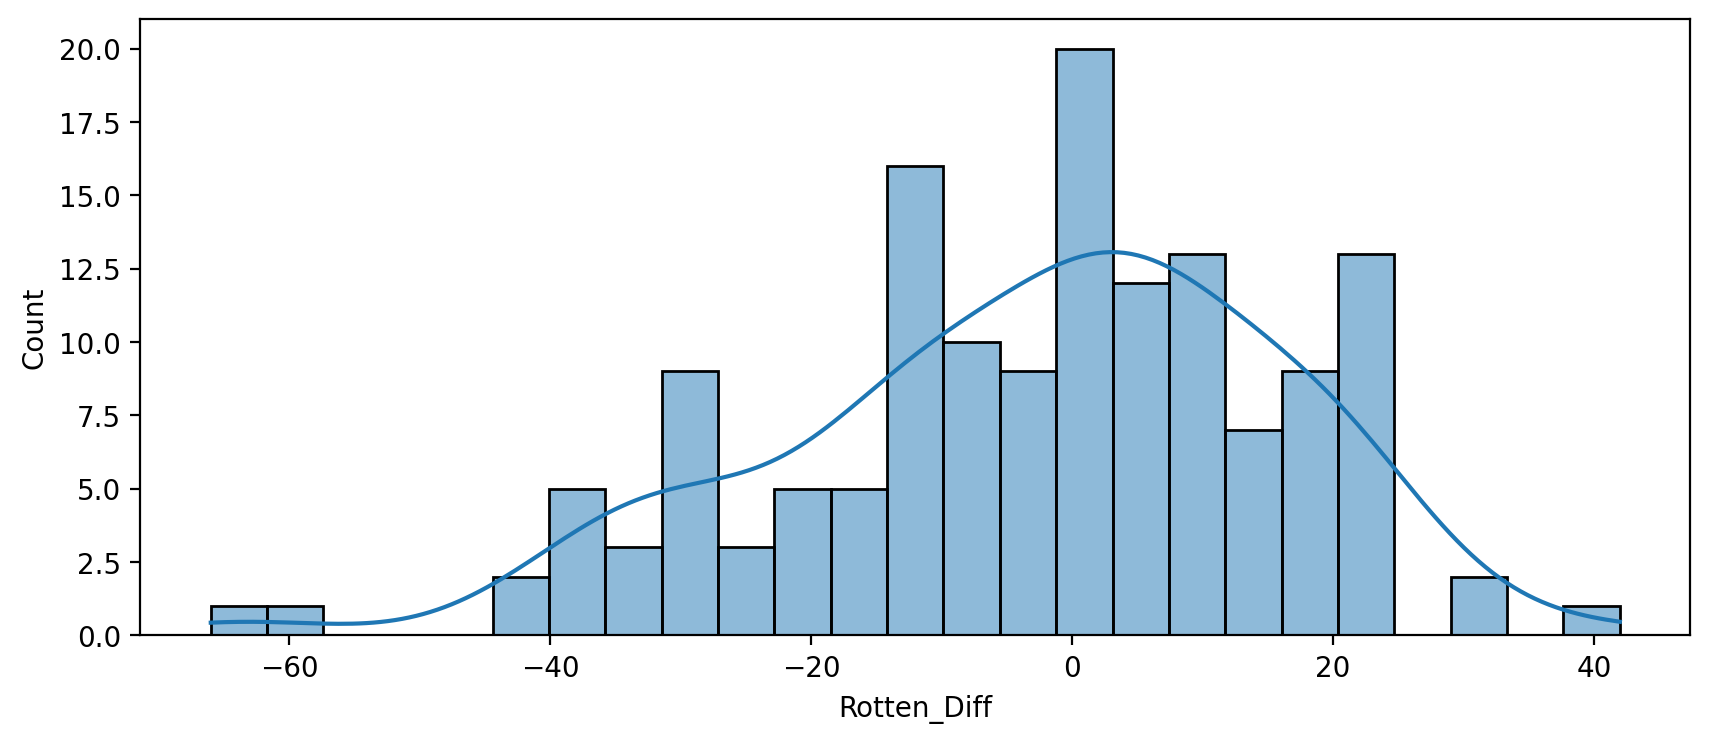

In [29]:
plt.figure(figsize = (10,4), dpi = 200)
sns.histplot(data= all_sites, x= 'Rotten_Diff', kde = True, bins = 25 )
plt.title = ('RT critics score minus RT user score')

**Created a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.**

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

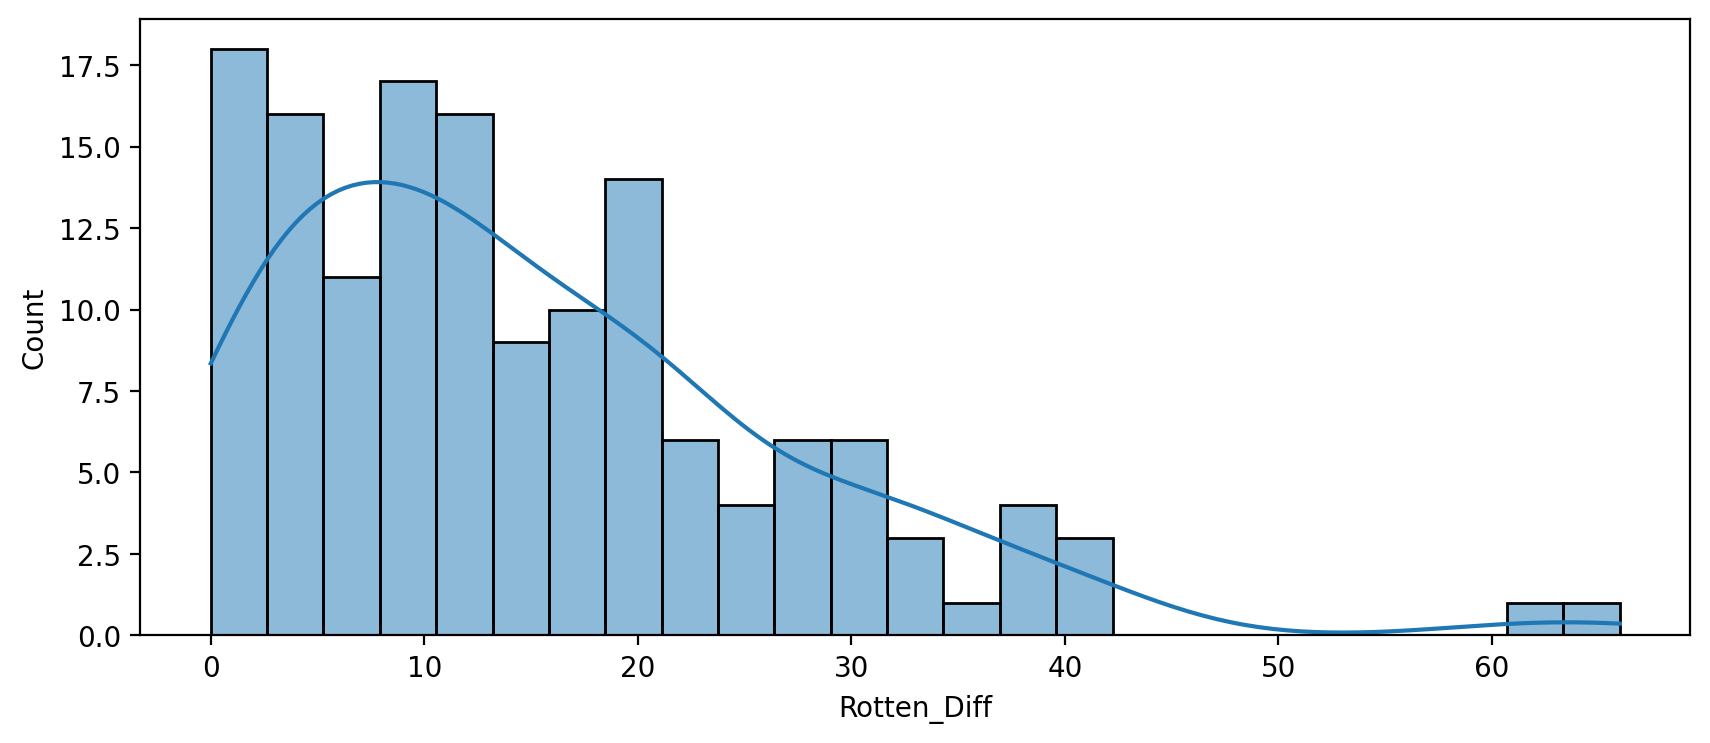

In [30]:
plt.figure(figsize = (10,4), dpi = 200)
sns.histplot(x = all_sites['Rotten_Diff'].abs(), kde = True, bins = 25 )

**I found out which movies are causing the largest differences. First, I show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**The top 5 movies users rated higher than critics on average:**

In [31]:
all_sites.nsmallest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**The top 5 movies critics scores higher than users on average:**

In [32]:
all_sites.nlargest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


**Analyzed MetaCritic ratings by comparing the official Metacritic rating to the average user rating using a scatterplot visualization.**

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

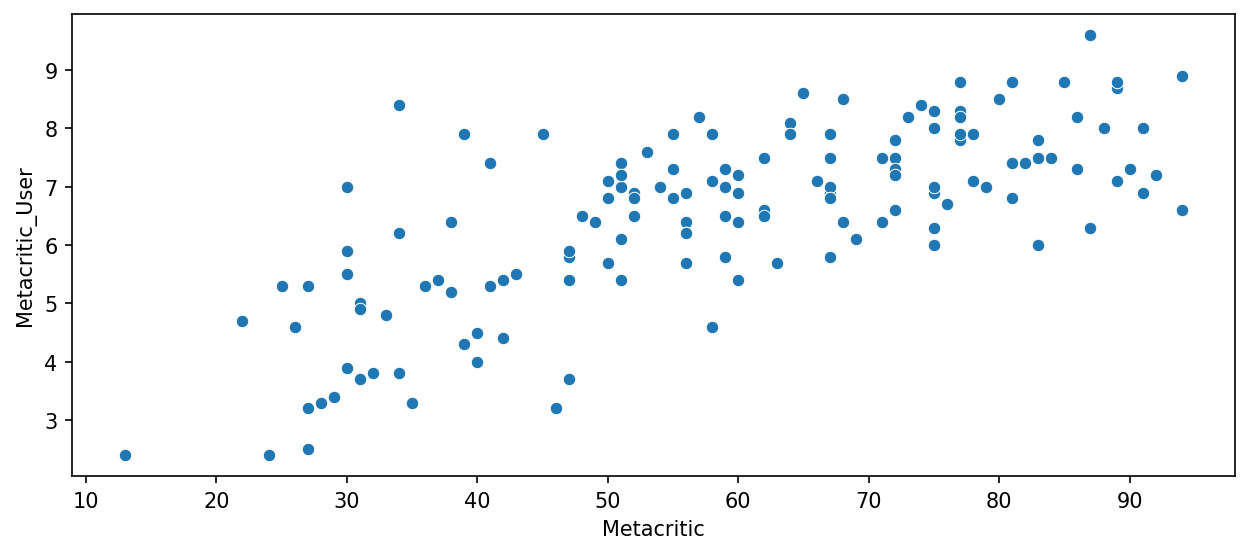

In [33]:
plt.figure(figsize =(10,4), dpi =150)
sns.scatterplot(data= all_sites, x = 'Metacritic', y ='Metacritic_User' )

**Analyzed IMDB by comparing vote counts on MetaCritic versus vote counts on IMDB using a scatterplot to explore the most popular movies.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

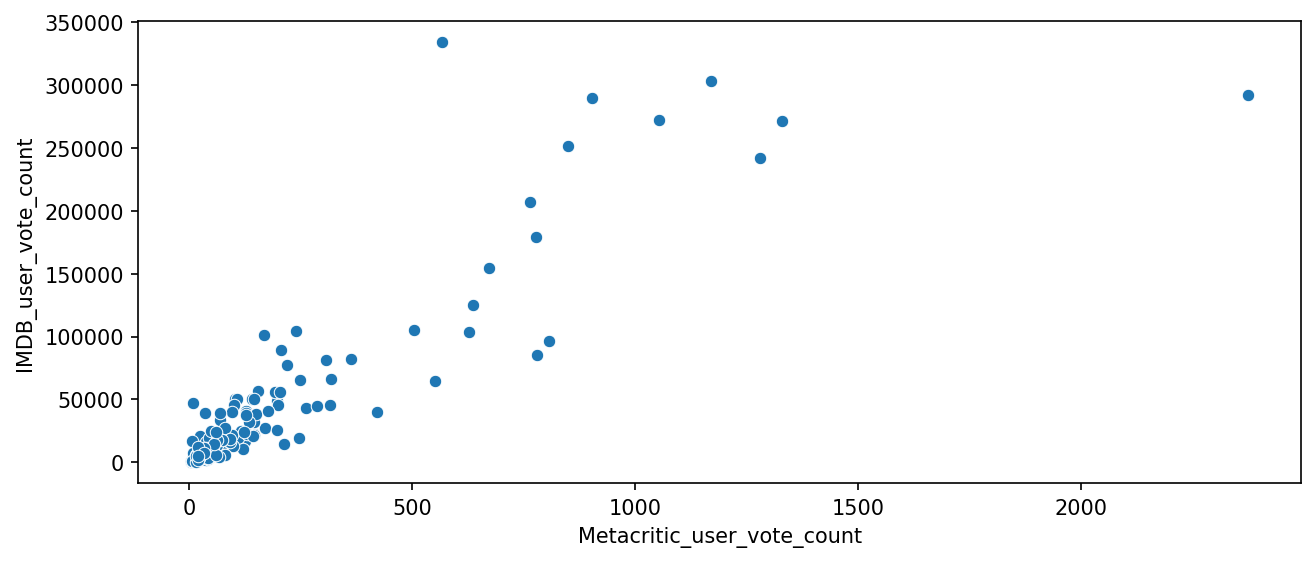

In [34]:
plt.figure(figsize =(10,4), dpi =150)
sns.scatterplot(data= all_sites, x = 'Metacritic_user_vote_count', y ='IMDB_user_vote_count' )

**Determined which movie has the highest IMDB user vote count.**

In [35]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Determined which movie has the highest Metacritic user Vote count.**

In [36]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandango Scores vs. All Sites

**To explore whether Fandango artificially displays higher ratings to boost ticket sales, we combined the Fandango and All Sites tables. Since not every movie in the Fandango table is present in the All Sites table (some have few or no reviews), we performed an inner merge on the `FILM` columns to compare only the movies that appear in both DataFrames.**

In [40]:
final_table = pd.merge(reviewed,all_sites,how='inner', on = 'FILM')


In [38]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

In [39]:
final_table.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),0.0,98,90,94,8.9,8.6,807,96252,8


## Normalize Ratings to Fandango's 0-5 Star Scale

Since RT, Metacritic, and IMDB use different scoring systems, it's necessary to normalize these values to match the 0-5 star scale used by Fandango. This ensures a fair comparison while maintaining the relationship between reviews.

Created new normalized columns for all ratings so they align within the 0-5 star range displayed by Fandango.

In [41]:
final_table['RT_Norm'] = round(final_table['RottenTomatoes'] / 20, 1)
final_table['RTU_Norm'] = round(final_table['RottenTomatoes_User'] / 20, 1)
final_table['Meta_Norm'] = round(final_table['Metacritic'] / 20, 1)
final_table['MetaU_Norm'] = round(final_table['Metacritic_User'] / 2, 1)
final_table['IMDB_Norm'] = round(final_table['IMDB'] / 2, 1)

In [42]:
final_table.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Created a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [43]:
norm_scores = final_table[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','MetaU_Norm','IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


## Compared Distribution of Scores Across Sites

**To determine if Fandango displays abnormally high ratings compared to other sites, a plot was created to compare the distributions of normalized ratings across all platforms. Using Seaborn's KDE plot, the differences in distribution were clearly visualized.**

**There are 2 alternative codes that I have provided here.**

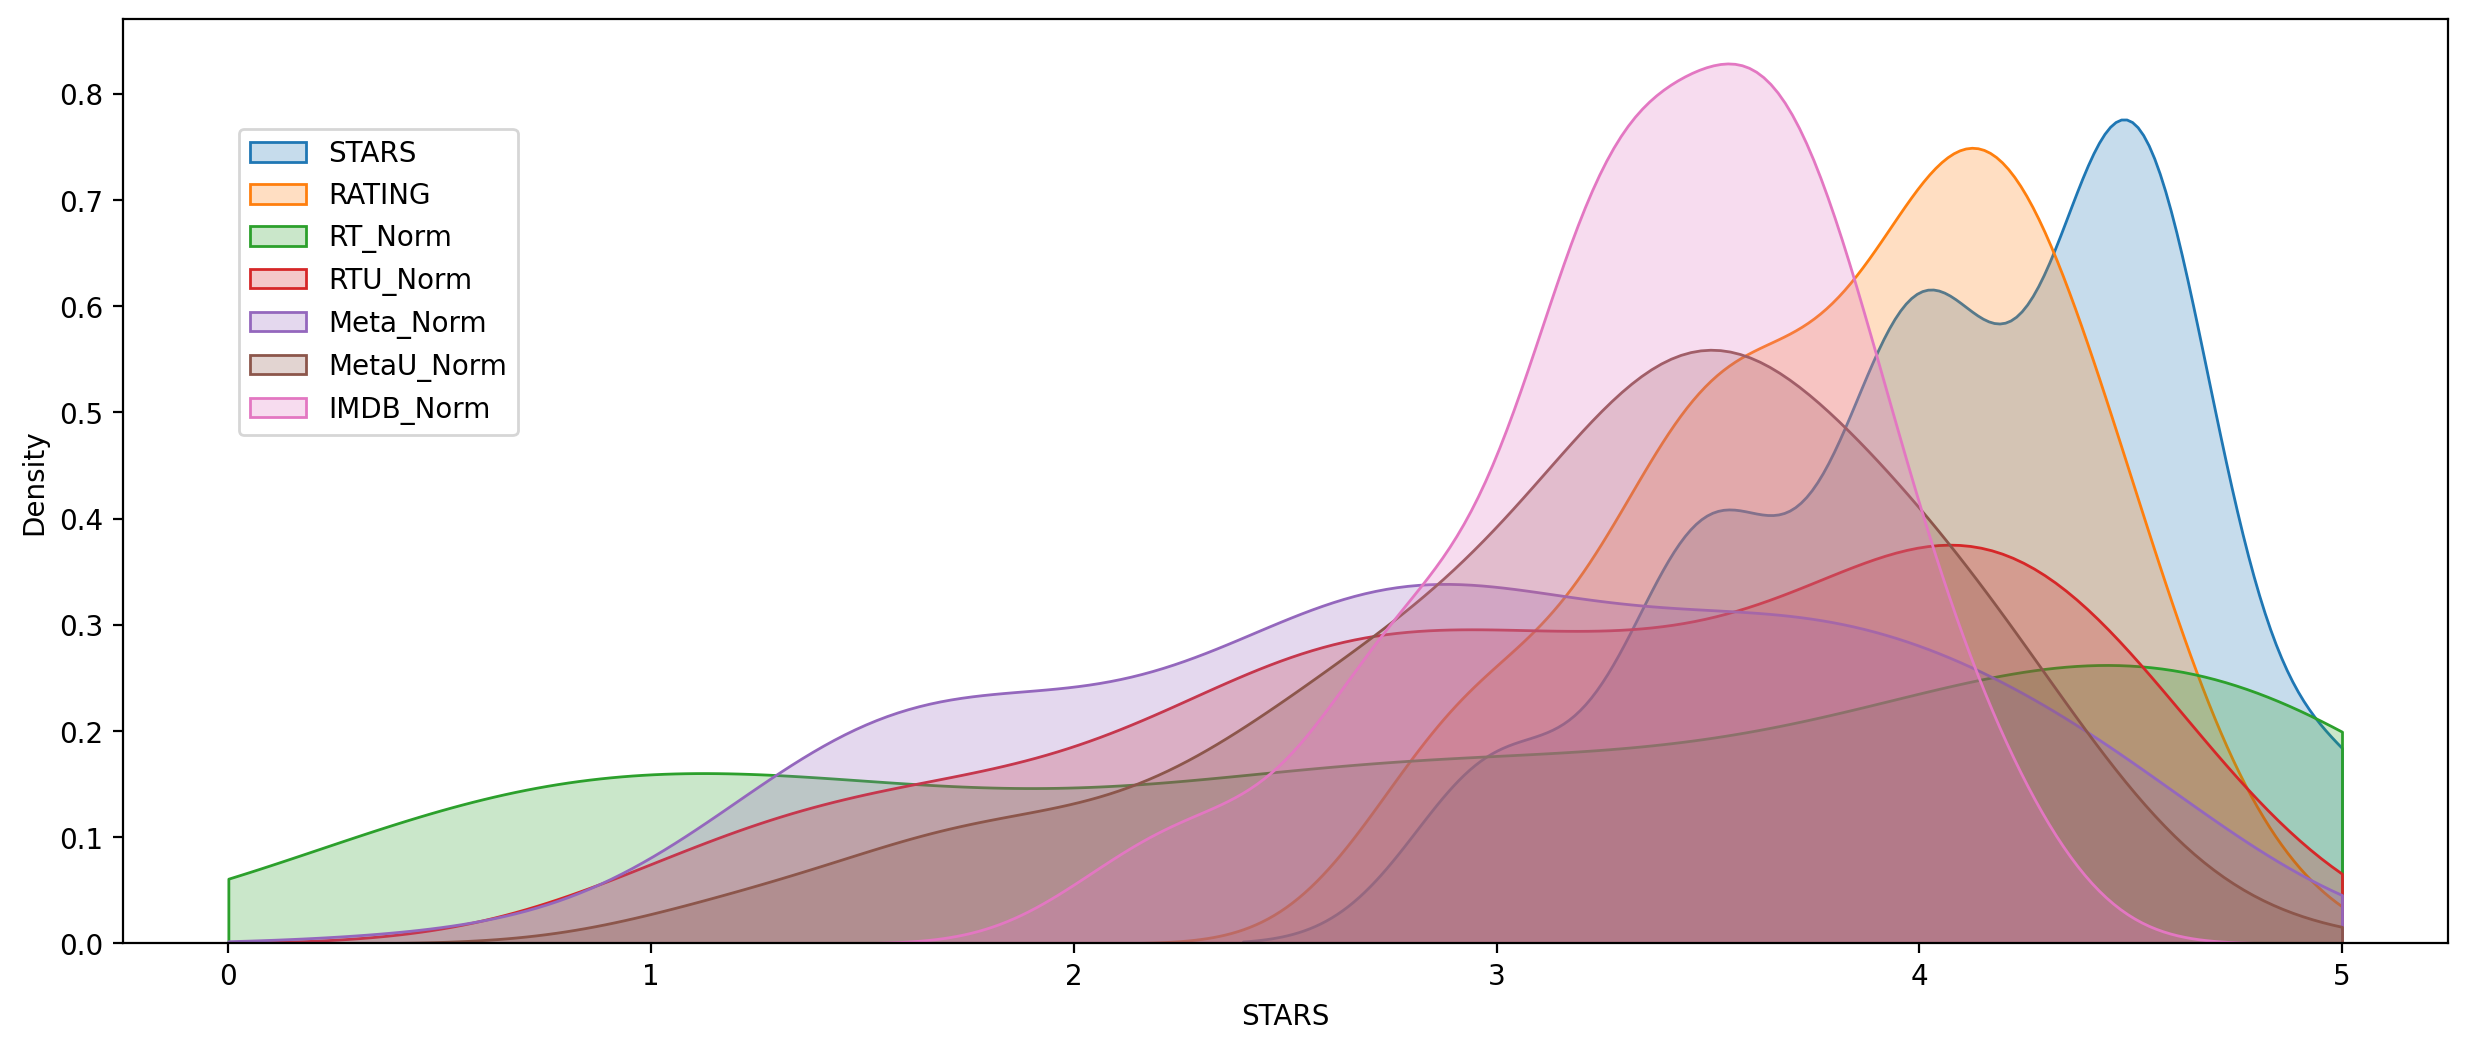

In [44]:
plt.figure(figsize = (15,6), dpi = 200)
sns.kdeplot(data = norm_scores, x = 'STARS', clip=[0,5], fill= True, palette = 'Set1', label= 'STARS' )
sns.kdeplot(data = norm_scores, x = 'RATING', clip=[0,5], fill= True, palette = 'Set1', label= 'RATING' )
sns.kdeplot(data = norm_scores, x = 'RT_Norm', clip=[0,5], fill= True, palette = 'Set1', label= 'RT_Norm' )
sns.kdeplot(data = norm_scores, x = 'RTU_Norm', clip=[0,5], fill= True, palette = 'Set1', label= 'RTU_Norm' )
sns.kdeplot(data = norm_scores, x = 'Meta_Norm', clip=[0,5], fill= True, palette = 'Set1', label= 'Meta_Norm' )
sns.kdeplot(data = norm_scores, x = 'MetaU_Norm', clip=[0,5], fill= True, palette = 'Set1',label= 'MetaU_Norm' )
sns.kdeplot(data = norm_scores, x = 'IMDB_Norm', clip=[0,5], fill= True, palette = 'Set1',label= 'IMDB_Norm' )
plt.legend(loc =(0.05,0.55))

In [45]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

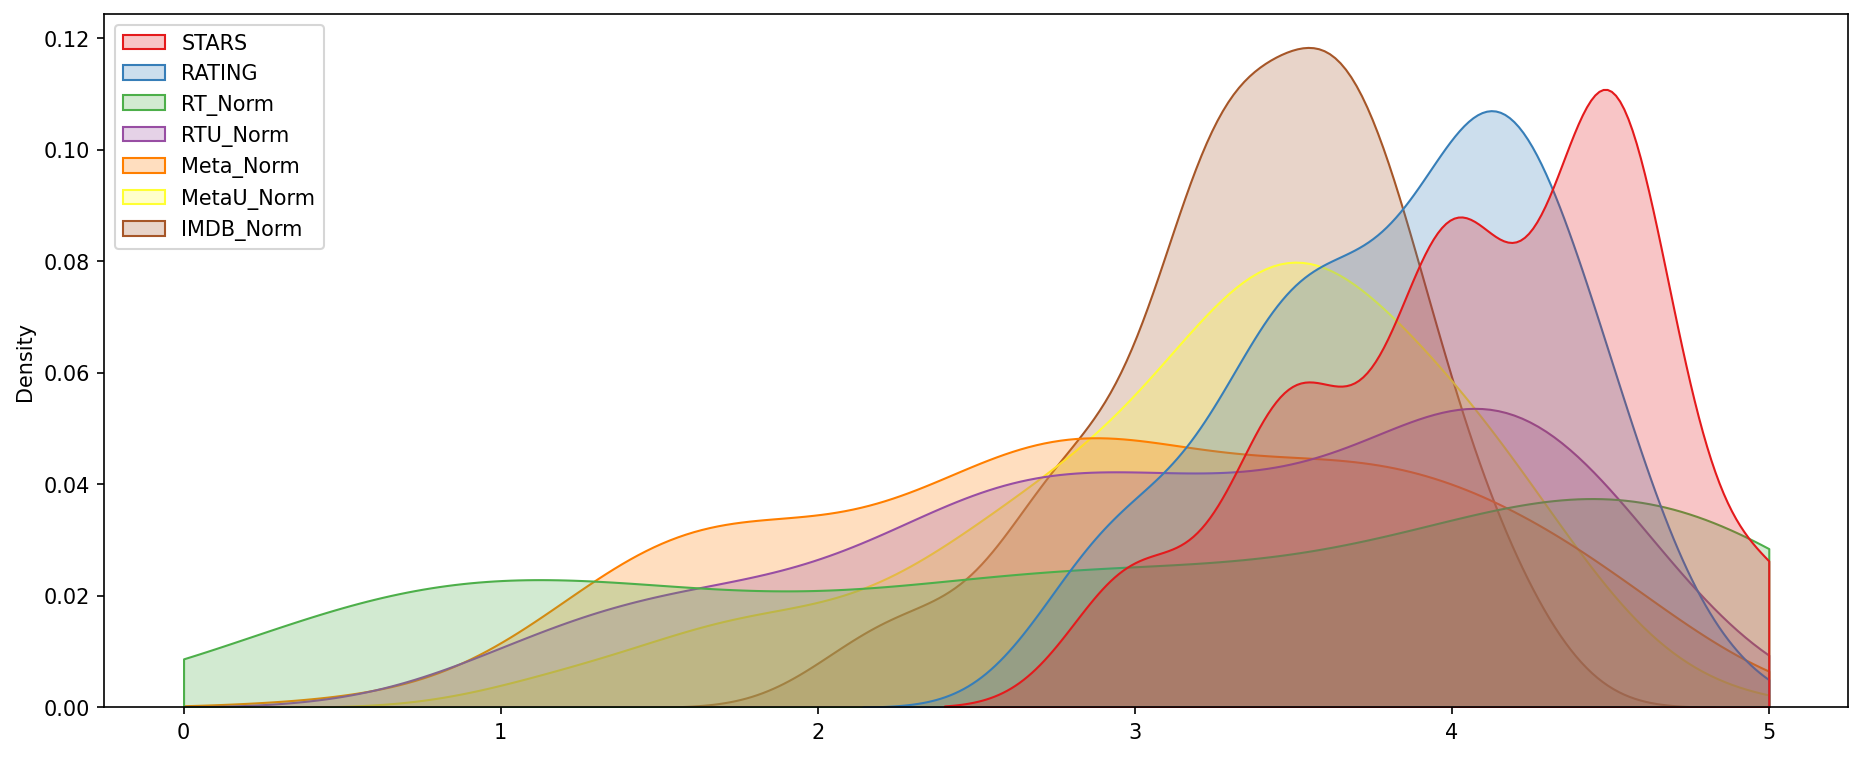

In [46]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

## Findings:

- Fandango's ratings distribution shows a clear unevenness, with a tendency towards higher ratings.
- In contrast, Rotten Tomatoes Critic ratings exhibit a more uniform distribution, indicating a balanced spread of ratings across the scale.
- Upon comparing the two using a KDE plot, the discrepancy between the uniformity of Rotten Tomatoes Critic ratings and the skewed nature of Fandango's STARS ratings becomes evident.

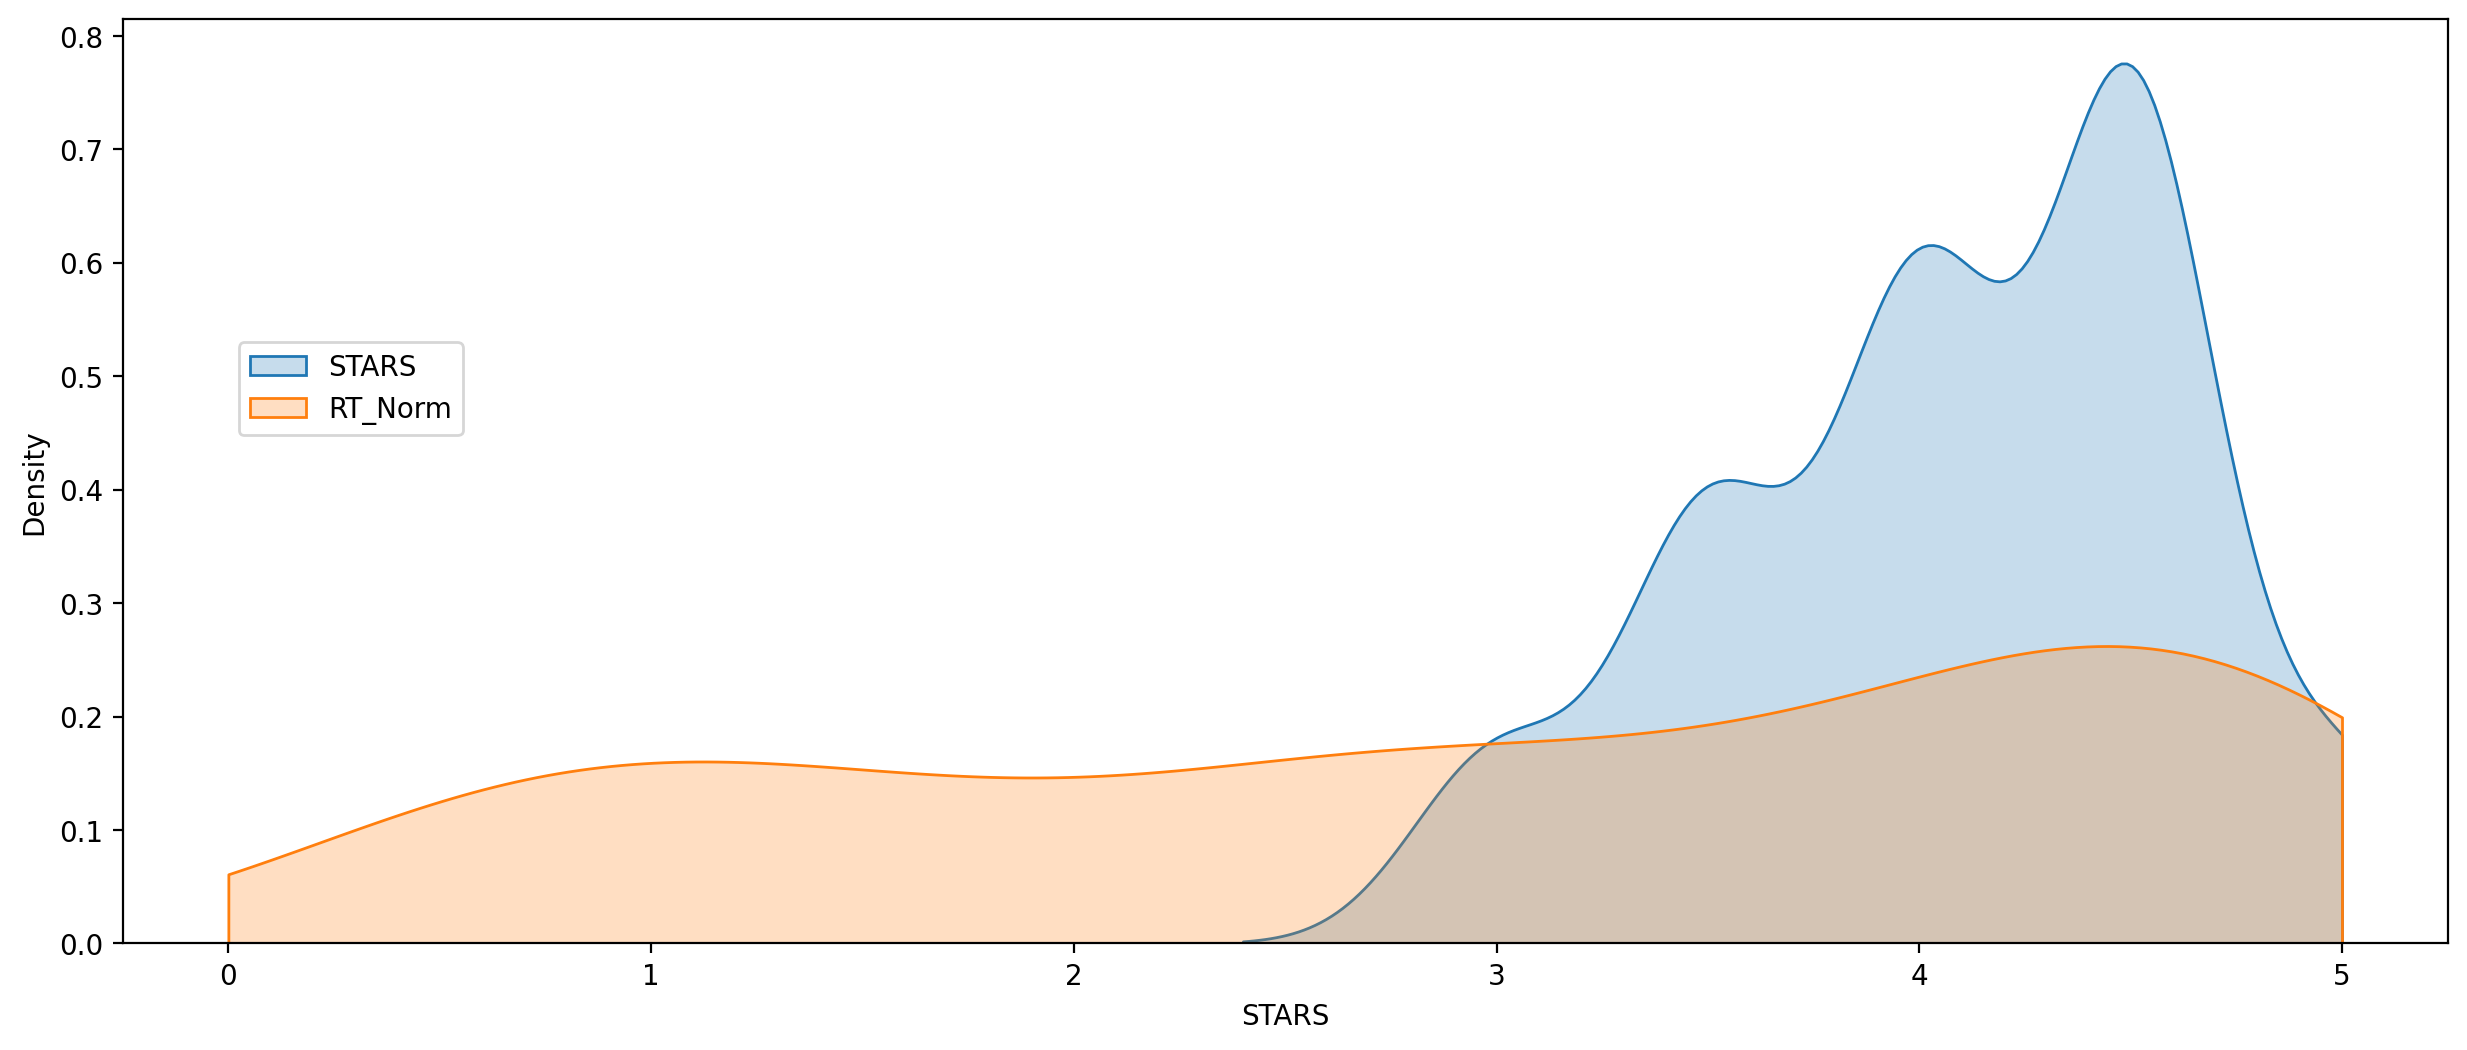

In [47]:
plt.figure(figsize = (15,6), dpi = 200)
sns.kdeplot(data = norm_scores, x = 'STARS', clip=[0,5], fill= True, label= 'STARS' )
sns.kdeplot(data = norm_scores, x = 'RT_Norm', clip=[0,5], fill= True, label= 'RT_Norm' )
plt.legend(loc =(0.05,0.55))

**Created a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies.**

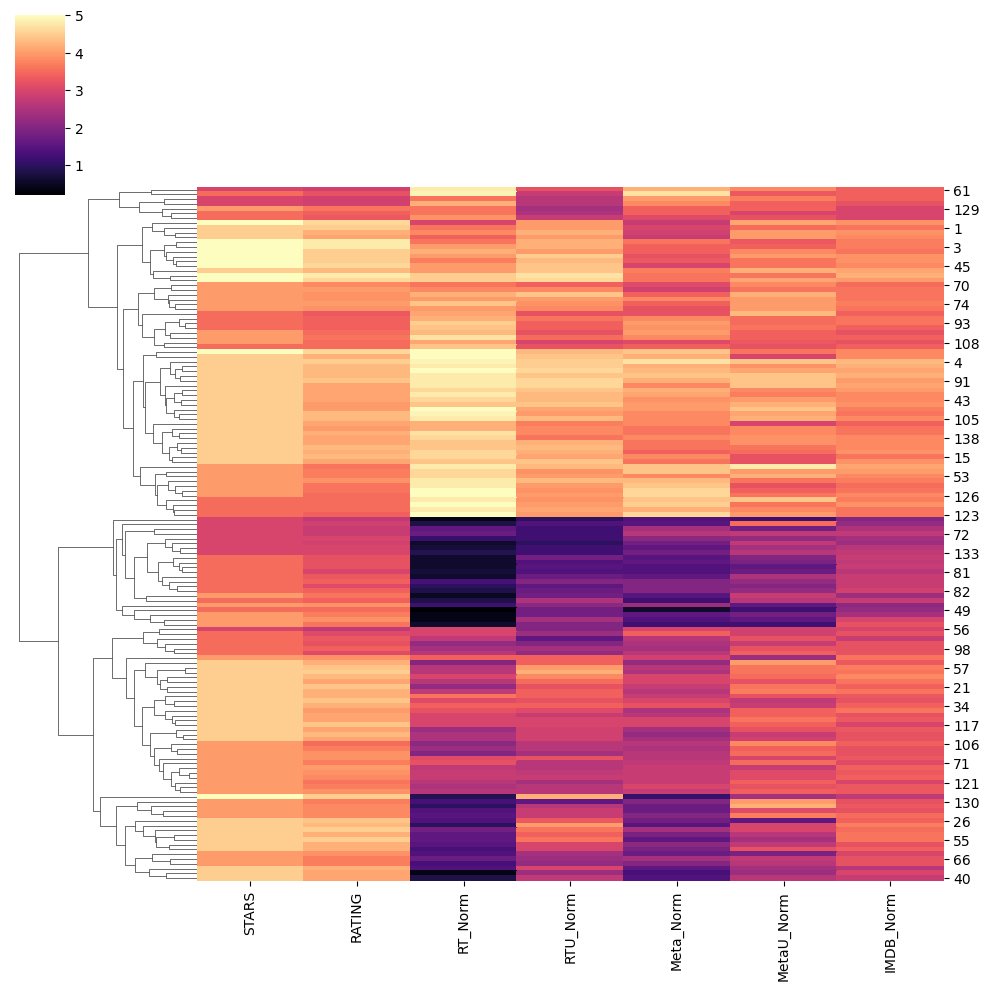

In [48]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

## Findings:

- Fandango consistently rates movies higher than other review platforms, often displaying ratings that are rounded up.
- This practice results in an inflated perception of movie quality on Fandango compared to other sites like Rotten Tomatoes.
- The discrepancy between Fandango's ratings and those from other platforms suggests a potential bias in how Fandango presents movie ratings to its users.

**Identified the top 10 lowest-rated movies based on Rotten Tomatoes Critic Ratings, Compared the normalized scores for these movies across all platforms to assess how they were rated relative to each other, Reintroduced the FILM column into the DataFrame of normalized scores to clearly view and compare the results.**

In [49]:
norm_scores = final_table[['FILM','STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','MetaU_Norm','IMDB_Norm']]
norm_scores.nsmallest(10, 'RT_Norm')

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


**Visualized the distribution of ratings across all sites for the top 10 worst movies.**

<AxesSubplot:ylabel='Density'>

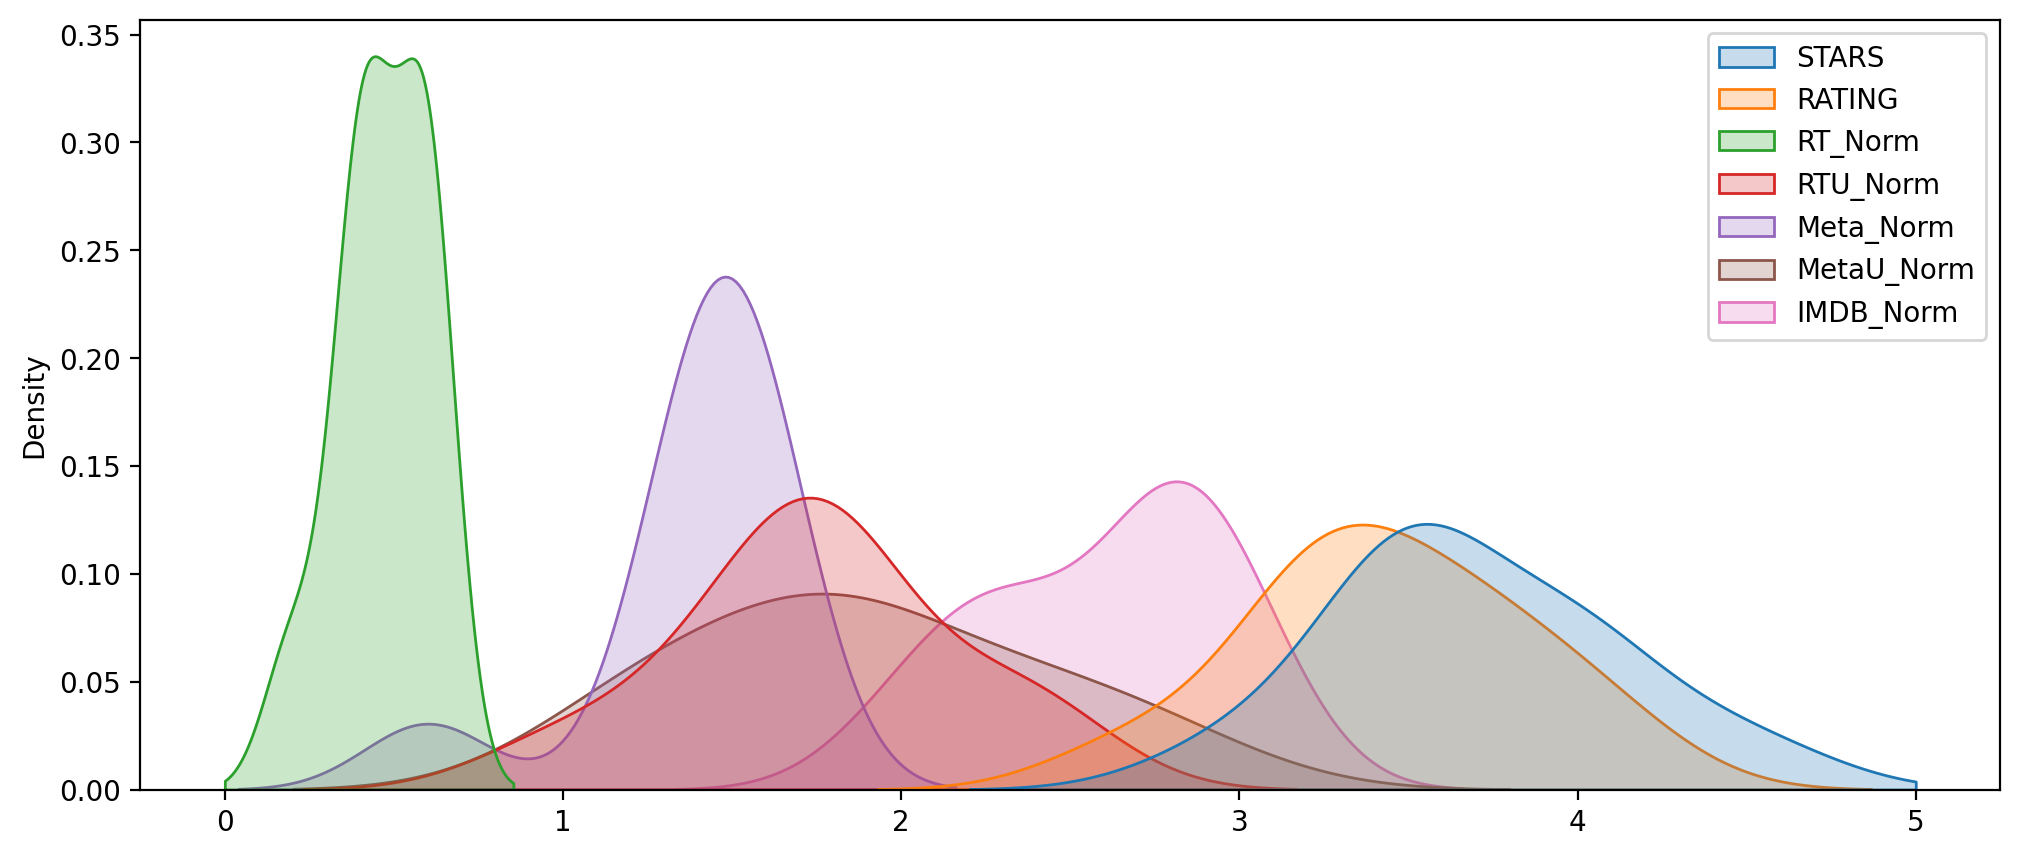

In [50]:
worst_movies = norm_scores.nsmallest(10, 'RT_Norm')
plt.figure(figsize = (12,5), dpi =200)
sns.kdeplot(data = worst_movies, clip=[0,5], fill= True )

### Key Findings:

  - Fandango consistently displayed higher ratings compared to other platforms.
  - The platform often rounded up ratings, presenting a more favorable image of movies.
  - A notable example is a movie rated 4.5 stars on Fandango, while its average rating across other sites was only 1.86 stars.

- **Implications**:
  - These inflated ratings could mislead consumers, leading to potential disappointment and erosion of trust.
  - The findings suggest that Fandango’s rating strategy may have been influenced by commercial interests, prioritizing ticket sales over accurate representation.

- **Conclusion**:
  - The analysis highlights the need for transparency and accuracy in online movie ratings.
  - It emphasizes the ethical responsibility of platforms to present unbiased and truthful information to maintain the integrity of the ratings and trust of the consumers.